In [138]:
import pandas as pd
df = pd.read_csv('ads.csv')
df


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [284]:

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler

inputs = df.drop('Purchased', axis='columns')
target = df['Purchased']


X_train, X_test, y_train, y_test = train_test_split(
    inputs, target, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


model = tree.DecisionTreeClassifier(max_leaf_nodes=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.9375

In [247]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(
    inputs, target, test_size=0.2)
model = RandomForestClassifier(n_estimators=40, random_state=9)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
model.score(X_test, y_test)


0.95

Text(69.0, 0.5, 'Truth')

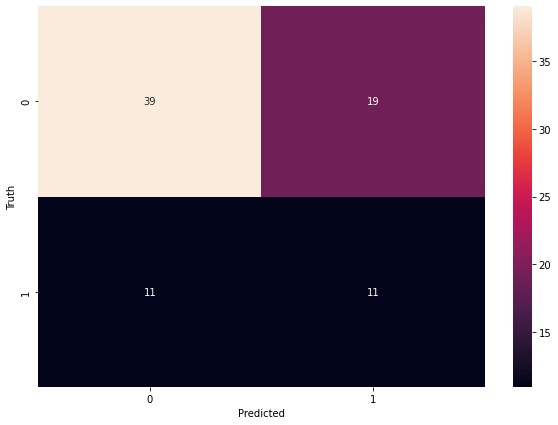

In [283]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [170]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [289]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target)
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.9440559440559441

In [208]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.958041958041958

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer = load_breast_cancer()

model_params = {
    'desc_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_leaf_nodes': [2, 5, 10, 40, 100]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10, 40,100],
            'criterion':['gini','entropy','log_loss']
        }
    }
}
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'],
                       cv=5, return_train_score=False)
    clf.fit(cancer.data, cancer.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df


,model,best_score,best_params
0,desc_tree,0.927915,{'max_leaf_nodes': 5}
1,random_forest,0.968374,"{'criterion': 'entropy', 'n_estimators': 40}"
